# Pymaceuticals Inc.
---

### Analysis
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how = "outer", on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [40]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df[df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicates["Mouse ID"]

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_id = df.set_index("Mouse ID")
dupe_id.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df  = dupe_id.drop(["g989"])
clean_df = clean_df.reset_index()


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_volume = clean_df.groupby(["Drug Regimen"])
t_mean = t_volume["Tumor Volume (mm3)"].mean()
t_med = t_volume["Tumor Volume (mm3)"].median()
t_var = t_volume["Tumor Volume (mm3)"].var()
t_std = t_volume["Tumor Volume (mm3)"].std()
t_sem = t_volume["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
t_volume_df = pd.DataFrame({
    "Mean Tumor Volume" : t_mean,
    "Median Tumor Volume" : t_med,
    "Tumor Volume Variance" : t_var,
    "Tumor Volume Std. Dev." : t_std,
    "Tumor Volume Std. Err." : t_sem})

t_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
t_volume_adv = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
t_volume_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

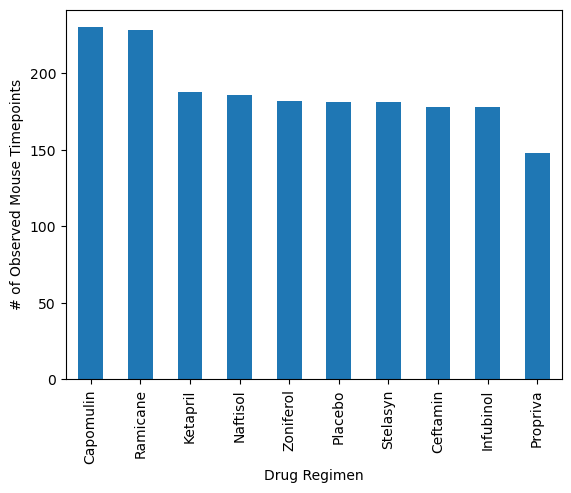

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint.sort_values (ascending=False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

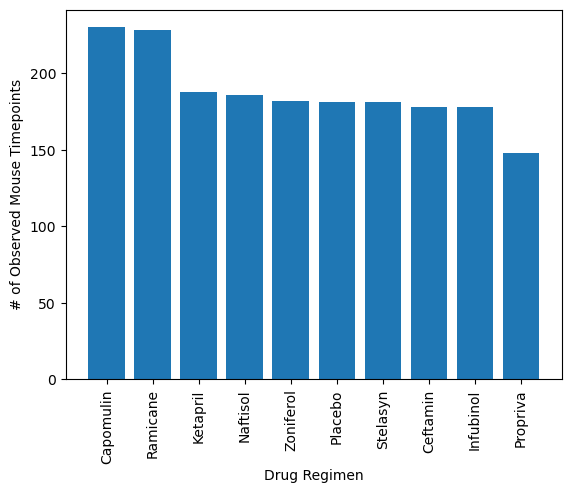

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_pp = timepoint.sort_values (ascending=False)
plt.bar(timepoint_pp.index, timepoint_pp.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

<Axes: ylabel='Sex'>

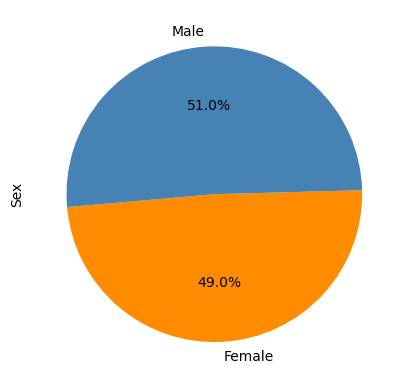

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(["Sex"])["Sex"].count()
colors = ["darkorange", "steelblue"]
sex.plot.pie(startangle=185, colors = colors, autopct='%0.1f%%')

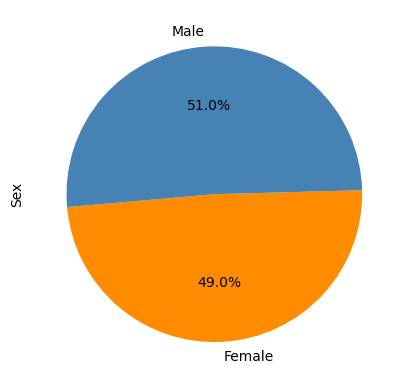

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["darkorange", "steelblue"]
plt.pie(sex, labels=('Female', 'Male'), startangle=185, autopct='%0.1f%%', colors=colors)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_w_timepoint = pd.merge(clean_df, last_timepoint_df, on=("Mouse ID"), how="right")
df_w_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b447,0,45.000000,0,Ceftamin,Male,2,30,0
1,x226,0,45.000000,0,Ceftamin,Male,23,28,0
2,f932,0,45.000000,0,Ketapril,Male,15,29,0
3,x336,0,45.000000,0,Naftisol,Female,4,29,0
4,l872,0,45.000000,0,Placebo,Male,19,30,0
...,...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30,45
1876,z969,30,65.841013,3,Naftisol,Male,9,30,45
1877,z969,35,69.176246,4,Naftisol,Male,9,30,45
1878,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [52]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatments_df = df_w_timepoint.loc[df_w_timepoint["Drug Regimen"] == treatment]
    
    # add subset 
    subset_df = treatments_df[treatments_df["Timepoint"] == treatments_df["Last Timepoint"]]
    tumor_volumes = subset_df["Tumor Volume (mm3)"]
    treatment_data.append(tumor_volumes)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    q_1 = quartiles[.25]
    q_3 = quartiles[.75]
    iqr = q_3 - q_1
    lower_bound = q_1 - (1.5*iqr)
    upper_bound = q_3 + (1.5*iqr)
    outliers = (tumor_volumes.loc[(subset_df["Tumor Volume (mm3)"] > upper_bound) | (subset_df["Tumor Volume (mm3)"] < lower_bound)])
    print(f"{treatment}'s potential outliers': {outliers}")

Capomulin's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers': 27    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)


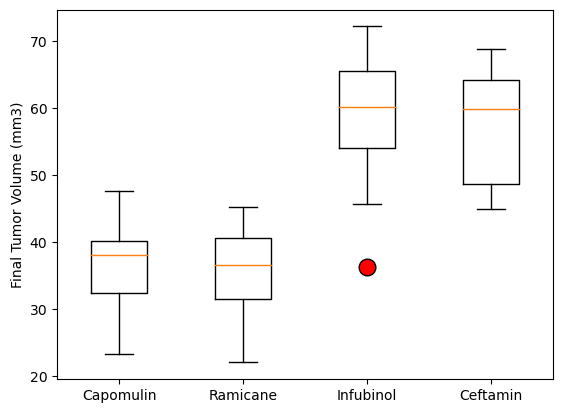

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor = 'r', markersize=12)
ax1.boxplot(treatment_data, flierprops = flierprops)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

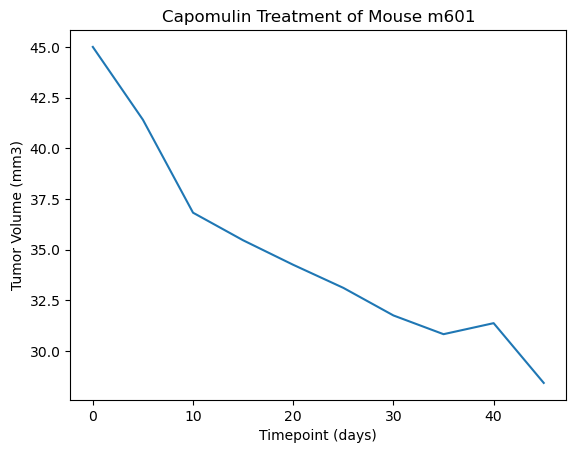

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = df_w_timepoint.loc[df_w_timepoint["Mouse ID"] == "m601"]
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse m601")
plt.show()

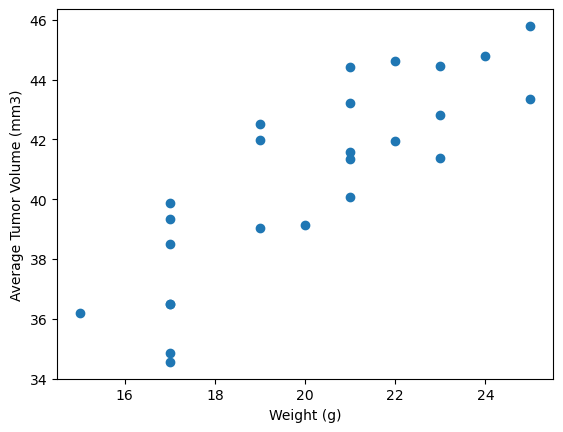

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
atv_df = pd.DataFrame(cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index())
atv_df = atv_df.rename(columns={"Tumor Volume (mm3)" : "Average Tumor Volume"})
cap_atv_df = pd.merge(cap_df, atv_df, on="Mouse ID")
cap_atv_df = cap_atv_df[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()

# generate plot
plt.scatter(cap_atv_df["Weight (g)"], cap_atv_df["Average Tumor Volume"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(cap_atv_df["Weight (g)"], cap_atv_df["Average Tumor Volume"])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}.")


The correlation between mouse weight and the average tumor volume is 0.84.
